<h1>Richter's Predictor: Modeling Earthquake Damage</h1>

Neste notebook eu analiso os dados da competição do DrivenData: https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/.

<h3>Visão geral do problema</h3>

Segundo o site do DriveData, baseado no aspectos de construção e localização de edifícios, o objetivo deste desafio é prever o nível de dano causado (nestes edifícios) pelo terremoto de Gorkha em 2015 no Nepal.

Os dados disponibilizados foram coletados de pesquisas do Kathmandu Living Labs e do Central Bureau of Statistics, que trabalham sob o National Planning Commission Secretariat of Nepal. Essas pesquisas consistem da maior coleta de dados pós-desastre já realizada, contento valiosas informações sobre impacto do terremoto, condições domésticas e estatísticas sócio-econômicas e demográficas.

<h3>Descrição do Problema</h3>

A variável alvo a ser predita no problema é uma variável discreta ordinal, chamada <font color='blue'>damage_grade</font>, que representa o nível de dano de um edifício atingido pelo terremoto. Essa variável possui 3 valores possíveis:
<ul>
    <li> 1: representa pouco dano</li>
    <li> 2: representa uma quantidade razoável de dano</li>
    <li> 3: representa quase destruição completa</li>
</ul>

A base de dados consiste de informações sobre a localização, estrutura e posse legal dos edifícios. Cada linha corresponde a um edifício na região atinginda pelo terremoto de Gorkha.
Existem 39 colunas na base de dados, sendo que a <font color='blue'>building_id</font> consiste de um identificador único atribuído de forma aleatória para cada edifício.

Os valores das variáveis categóricas foram trocados por caracteres ascii de forma aleatória, o que as tornam variavés discretas nominais, uma vez que não é possível estabeler, a priori, uma ordem de importância para cada categoria. _O mesmo caracter pode aparecer em diferentes colunas, mas isso não implica que eles representem o mesmo valor original em cada variável._

Todas as colunas da base de dados estão descritas a seguir:

<ul>
    <li><font color='blue'>building_id (type: int)</font>: identificador único do edifício</li>
    <li><font color='blue'>geo_level_1_id (type: int)</font>, <font color='blue'>geo_level_2_id (type: int)</font>, <font color='blue'>geo_level_3_id (type: int)</font>: região geográfica em que o edifício estava localizado, da maior (geo_level_1) para a sub-região mais específica (geo_level_3). Valores possíveis: geo_level_1: 0-30, geo_level_2: 0-1427, geo_level_3: 0-12567.</li>
    <li><font color='blue'>count_floors_pre_eq (type: int)</font>: número de andares do edifício antes do terremoto.</li>
    <li><font color='blue'>age (type: int)</font>: idade do edifício em anos.</li>
    <li><font color='blue'>area_percentage (type: int)</font>: área normalizada do edifício.</li>
    <li><font color='blue'>height_percentage (type: int)</font>: altura normalizada do edifício.</li>
    <li><font color='blue'>land_surface_condition (type: categorical)</font>: condição da superfície do terreno onde o edifício foi construído. Valores possíveis: n, o, t.</li>
    <li><font color='blue'>foundation_type (type: categorical)</font>: tipo de fundação usada na construção. Valores possíveis: h, i, r, u, w.</li>
    <li><font color='blue'>roof_type (type: categorical)</font>: tipo de telhado usado na construção. Valores possíveis: n, q, x.</li>
    <li><font color='blue'>ground_floor_type (type: categorical)</font>: tipo de andar térreo. Valores possíveis: f, m, v, x, z.</li>
    <li><font color='blue'>other_floor_type (type: categorical)</font>: tipo de construções utilizadas em pisos superiores ao térreo (exceto telhado). Valores possíveis: j, q, s, x.</li>
    <li><font color='blue'>position (type: categorical)</font>: posição do edifício. Valores possíveis: j, o, s, t.</li>
    <li><font color='blue'>plan_configuration (type: categorical)</font>: configuração do plano de construção. Valores possíveis: a, c, d, f, m, n, o, q, s, u.</li>
    <li><font color='blue'>has_superstructure_adobe_mud (type: binary)</font>: variável que indica se a superestrutura foi feita de Adobe/barro.</li>
    <li><font color='blue'>has_superstructure_mud_mortar_stone (type: binary)</font>: variável que indica se a superestrutura foi feita de argamassa de barro - pedra.</li>
    <li><font color='blue'>has_superstructure_stone_flag (type: binary)</font>: variável que indica se a superestrutura foi feita de pedra.</li>
    <li><font color='blue'>has_superstructure_cement_mortar_stone (type: binary)</font>: variável que indica se a superestrutura foi feita de argamassa de cimento - pedra.</li>
    <li><font color='blue'>has_superstructure_mud_mortar_brick (type: binary)</font>: variável que indica se a superestrutura foi feita de argamassa de barro - tijolo.</li>
    <li><font color='blue'>has_superstructure_cement_mortar_brick (type: binary)</font>: variável que indica se a superestrutura foi feita de argamassa de cimento - tijolo.</li>
    <li><font color='blue'>has_superstructure_timber (type: binary)</font>: variável que indica se a superestrutura foi feita de madeira.</li>
    <li><font color='blue'>has_superstructure_bamboo (type: binary)</font>: variável que indica se a superestrutura foi feita de bambu.</li>
    <li><font color='blue'>has_superstructure_rc_non_engineered (type: binary)</font>: variável que indica se a superestrutura foi feita de concreto armado não projetado.</li>
    <li><font color='blue'>has_superstructure_rc_engineered (type: binary)</font>: variável que indica se a superestrutura foi feita de concreto armado projetado.</li>
    <li><font color='blue'>has_superstructure_other (type: binary)</font>: variável que indica se a superestrutura foi feita de algum outro material.</li>
    <li><font color='blue'>legal_ownership_status (type: categorical)</font>: estatuto de propriedade legal do terreno onde o edifício foi construído: a, r, v, w.</li>
    <li><font color='blue'>count_families (type: int)</font>: número de famílias que moram no prédio.</li>
    <li><font color='blue'>has_secondary_use (type: binary)</font>: variável que indica se o edifício era utilizado para alguma finalidade secundária.</li>
    <li><font color='blue'>has_secondary_use_agriculture (type: binary)</font>: variável que indica se o edifício era utilizado para finalidade agrícola.</li>
    <li><font color='blue'>has_secondary_use_hotel (type: binary)</font>: variável que indica se o edifício era utilizado com um hotel.</li>
    <li><font color='blue'>has_secondary_use_rental (type: binary)</font>: variável que indica se o edifício era utilizado para finalidade de locação.</li>
    <li><font color='blue'>has_secondary_use_institution (type: binary)</font>: variável que indica se o edifício era utilizado como localização de alguma instituição.</li>
    <li><font color='blue'>has_secondary_use_school (type: binary)</font>: variável que indica se o edifício era utilizado como escola.</li>
    <li><font color='blue'>has_secondary_use_industry (type: binary)</font>: variável que indica se o edifício era utilizado para finalidade industrial.</li>
    <li><font color='blue'>has_secondary_use_health_post (type: binary)</font>: variável que indica se o edifício era utilizado como posto de saúde.</li>
    <li><font color='blue'>has_secondary_use_gov_office (type: binary)</font>: variável que indica se o edifício era utilizado como escritório do governo.</li>
    <li><font color='blue'>has_secondary_use_use_police (type: binary)</font>: variável que indica se o edifício era utilizado como estação policial.</li>
    <li><font color='blue'>has_secondary_use_other (type: binary)</font>: variável que indica se o edifício era usado secundariamente para outros fins.</li>
</ul>


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#irei importar as demais bibliotecas a medida que for necessário

data_path = 'D:\Documents\Google Drive\Competicoes\DrivenData\Earthquake'
train_data_file = os.path.join(data_path,'train_values.csv')
train_label_file = os.path.join(data_path,'train_labels.csv')
test_data_file = os.path.join(data_path,'test_values.csv')

#carregando os dados de treinamento e os rótulos da variável alvo
train_data = pd.read_csv(train_data_file, index_col='building_id')
label_data = pd.read_csv(train_label_file, index_col='building_id')

print("Datasets Loaded.")

Datasets Loaded.


In [2]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
label_data.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


Cada instância da tabela de rótulos referentes ao <font color='blue'>damage_grade</font> de cada edíficio está relacionada com a tabela de dados de treinamento através do índice - <font color='blue'>building_id</font>.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

Uma visão geral da base de treinamento mostra que existem 260.601 registros de edifícios, e nenhuma das variáveis (colunas) possuem elementos nulos, ou seja, não existem dados ausentes na base.

<h3>Tipos de dados</h3>

As variáveis da base de dados podem ser divididas em quantitativas (discretas ou contínuas) e qualitativas.
Das variáveis qualitativas tem-se: as categóricas nominais e as binárias.

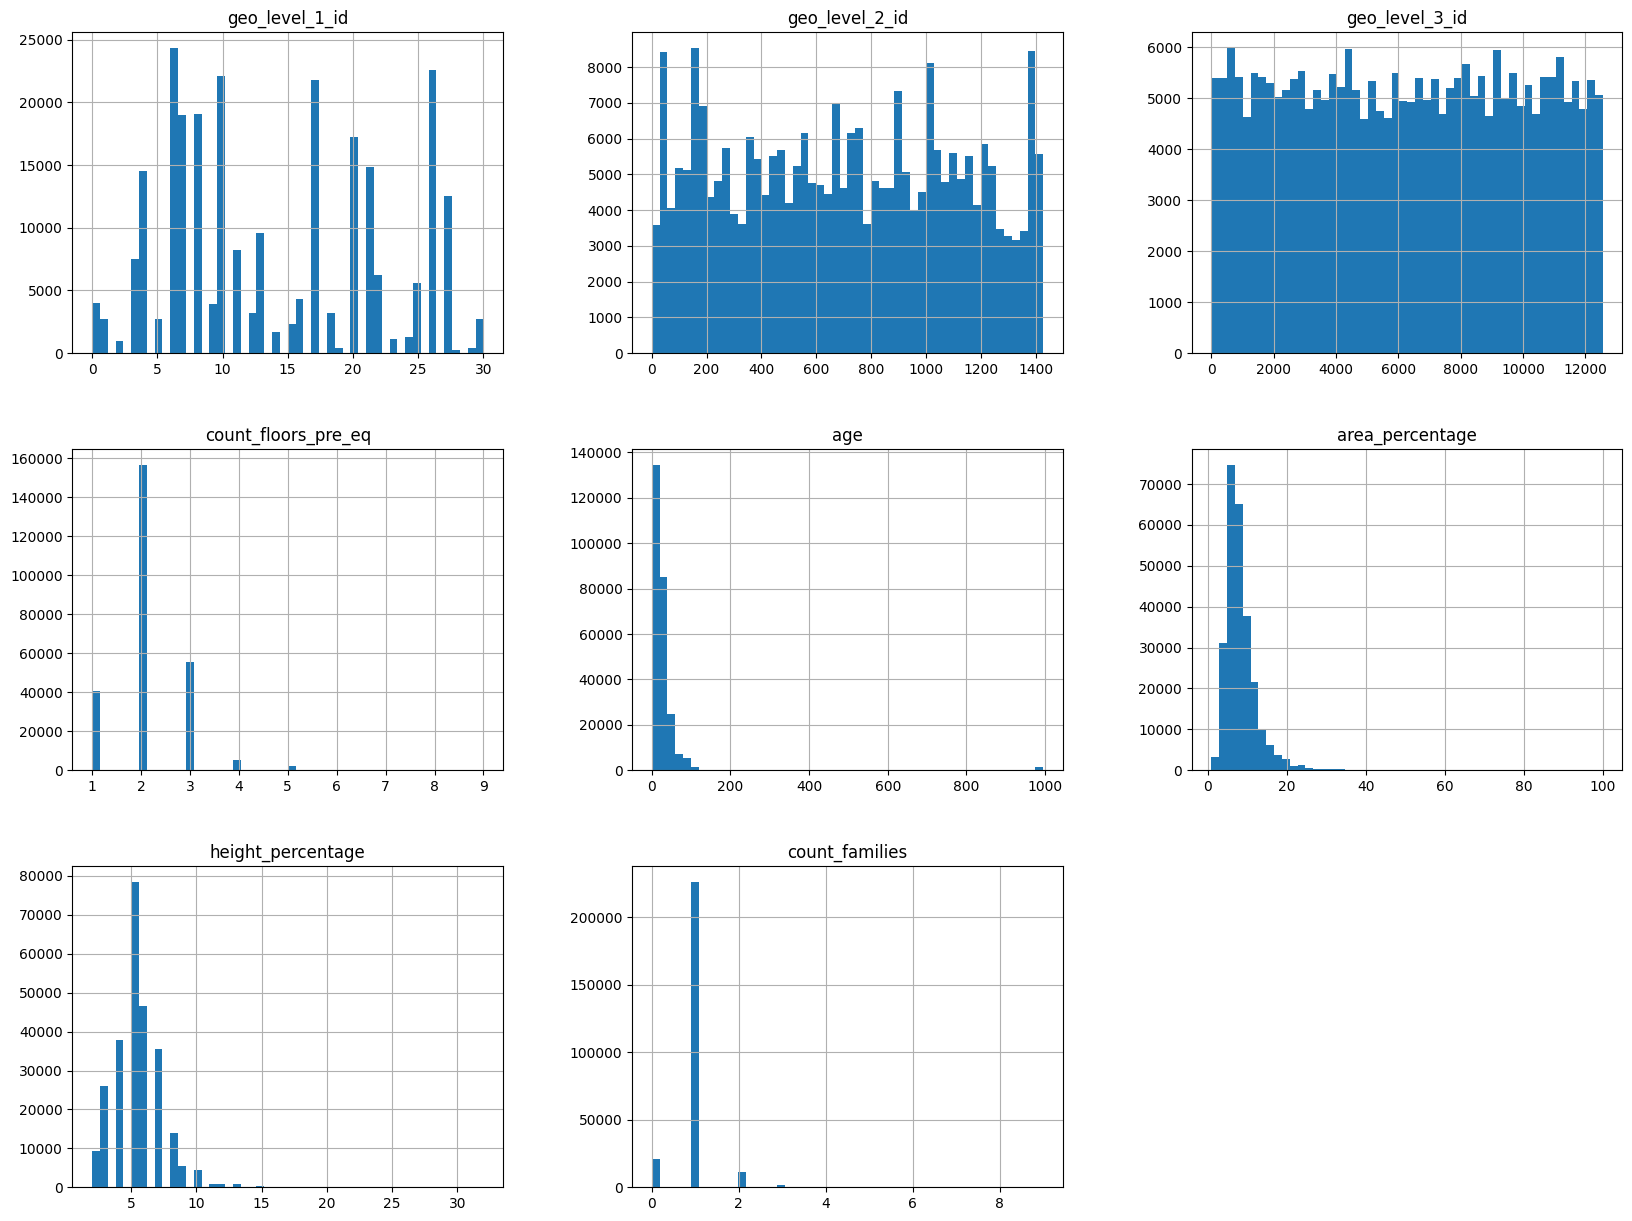

In [5]:
#variáveis categóricas nominais
cat_attrs = [col for col in train_data.columns if train_data[col].dtype == 'object']
#variáveis categóricas binárias
bin_attrs = [col for col in train_data.columns if 'has_s' in col]
#variáveis quantitativas (ou numéricas)
num_attrs = [col for col in train_data.columns if (train_data[col].dtype == 'int64' and col not in bin_attrs)]

#cada conjunto será analisado separadamente
train_data_cat = train_data[cat_attrs].copy()
train_data_num = train_data[num_attrs].copy()
train_data_bin = train_data[bin_attrs].copy()

train_data_num.hist(bins=50, figsize=(20,15))
plt.show()

<h3>Análise Exploratória de Dados</h3>

À primeira vista é possível perceber que as variáveis <font color='blue'>age</font> e <font color='blue'>area_percentage</font> possuem alguns registros com valores muito acima da distribuição de dados típica da variável, indicando a presença de outliers.

A grande maioria dos edifícios eram ocupados por uma única família.  

E sobre as variáveis de localização geográfica, se percebe uma certa concentração de edifícios em determinadas regiões do primeiro nível de localização (geo_level_1), mas a medida que caminha-se para os níveis mais específicos (geo_level_2 e geo_level_3) as variáveis apresentam um distribuição mais próxima da uniforme (constante), o que é uma característica presente em dados puramente aleatórios.

É necessário entender como essas variáveis de localização geográfica se relacionam.  
Selecionando os registros com <font color='blue'>geo_level_3_id</font> entre 0 e 3:

In [6]:
train_data_num[train_data_num['geo_level_3_id']<=3]

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
building_id,,,,,,,,
106638,30,73,3,2,5,15,6,1
360318,30,73,3,1,10,8,3,1
743528,30,73,3,1,20,5,3,0
422779,15,194,1,2,15,3,4,1
656381,12,179,0,2,15,6,4,1
5985,15,194,1,3,10,6,6,1
175819,30,73,3,1,25,7,3,1
337533,15,194,1,3,30,6,6,1
447531,15,194,1,3,20,6,7,1


In [7]:
#verifica se um geo_level_2 está associado a mais de um geo_level_1
aux = 1
#para todos os valores de geo_level_2_id
for geo_id in train_data_num['geo_level_2_id'].unique():
    #verifica se o geo_level_1_id tem mais de um valor único associado
    if len(train_data_num[train_data_num['geo_level_2_id']==geo_id]['geo_level_1_id'].unique())>1:
        aux+=1
print('Número de valores únicos em geo_level_1_id associados a cada geo_level_2_id:',aux)

Número de valores únicos em geo_level_1_id associados a cada geo_level_2_id: 1


Percebe-se que cada valor do geo_level_3 está associado a apenas uma única região do nível superior geo_level_2, e o mesmo acontece com o geo_level_2 em relação ao geo_level_1. 

Entretanto, a organização das regiões através dos identificadores não parece seguir uma sequência lógica, de maneira que a região geo_level_3 igual 1 não está associada com as regiões geo_level_2 = 1 ou geo_level_1 = 1. Da mesma forma, não se observa que as regiões geo_level_3 igual a 0 e igual a 1 estejam associadas à mesma região em geo_level_2, na verdade elas pertecem às regiões 179 e 194, respectivamente. Que por sua vez pertencem às regiões 12 e 15, respectivamente, no geo_level_1.

Outro aspecto interessante é que existem rótulos de regiões que estão ausentes na base, por exemplo, não existe nenhum edifício localizado na região de <font color='blue'>geo_level_3_id</font> = 2 (embora os range de valores dessa variável seja 0-12567).

É possível verificar como os níveis de dano estão distribuídos ao longo das regiões no primeiro nível (<font color='blue'>geo_level_1_id</font>):

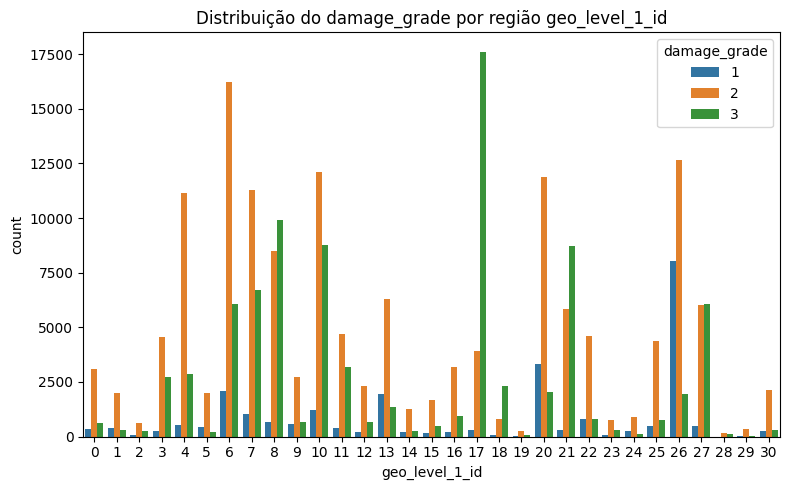

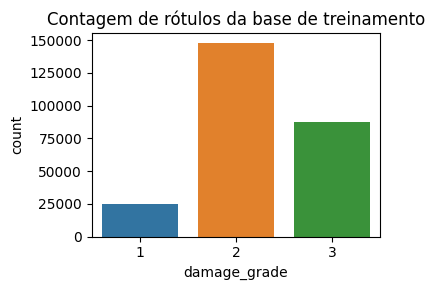

Percentual de ocorrência de cada nível de dano:


,percent
damage_grade,
1,9.640792
2,56.891186
3,33.468022


In [8]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(train_data_num[['geo_level_1_id']].join(label_data['damage_grade']),
           x='geo_level_1_id', hue='damage_grade', ax=ax)
ax.set_title('Distribuição do damage_grade por região geo_level_1_id')
fig.tight_layout()
plt.show()

fig,ax = plt.subplots(figsize=(4,3))
sns.countplot(label_data, x='damage_grade',ax=ax)
ax.set_title('Contagem de rótulos da base de treinamento')
fig.tight_layout()
plt.show()

print('Percentual de ocorrência de cada nível de dano:')
data_len = label_data.shape[0]
label_data.groupby('damage_grade').apply(lambda x: 100*x.count()/data_len).rename(columns={'damage_grade':'percent'})

Algumas regiões possuem predominância de certo nível de dano, por exemplo, as regiões 8, 17 e 18 apresentam uma quantidade maior de registros com <font color='blue'>damage_grade</font> = 3. Não existe nenhuma região com predominância de dano <font color='blue'>damage_grade</font> = 1. Isso é, de certa forma, esperado, quando se verifica que apenas 9,64% dos registros correspondem ao <font color='blue'>damage_grade</font> = 1. Trata-se de uma base de dados **desbalanceada** com relação aos rótulos de classificação.

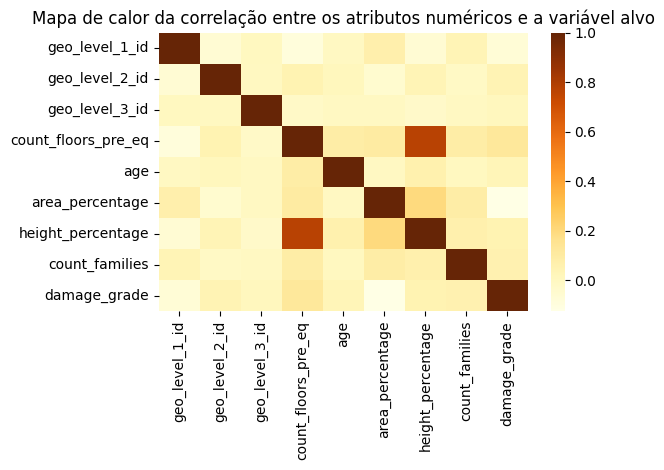

damage_grade           1.000000
count_floors_pre_eq    0.122308
count_families         0.056151
height_percentage      0.048130
geo_level_2_id         0.043161
age                    0.029273
geo_level_3_id         0.007932
geo_level_1_id        -0.072347
area_percentage       -0.125221
Name: damage_grade, dtype: float64

In [9]:
fig,ax = plt.subplots()
colormap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(train_data_num.join(label_data['damage_grade']).corr(), ax=ax, cmap=colormap)
ax.set_title('Mapa de calor da correlação entre os atributos numéricos e a variável alvo')
fig.tight_layout()
plt.show()
train_data_num.join(label_data['damage_grade']).corr()['damage_grade'].sort_values(ascending=False)

As variáveis numéricas são pobremente correlacionadas com a variável alvo (<font color='blue'>damage_grade</font>). 

Além das variáveis geográficas, duas variáveis numéricas são de contagem e as demais são variáveis escalares. Das 3 variáveis escalares, pode-se considerar a presença de outliers apenas na <font color='blue'>age</font>, as variáveis <font color='blue'>area_percentage</font> e <font color='blue'>height_percentage</font> apresentam distribuição assimétrica com uma calda maior para a direita (como visto no histograma), dessa forma, não faz sentido caracterizar os valores destacados nos boxplots como outliers.

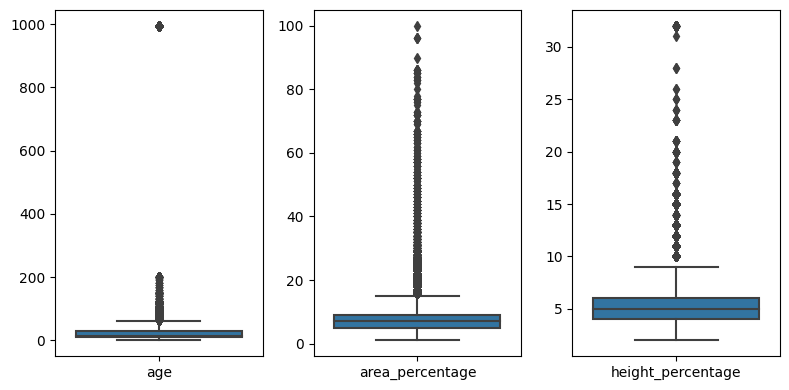

In [10]:
#boxplot das variáveis escalares
cols = [col for col in num_attrs if ('geo_level' not in col)and('count' not in col)]
fig,axs = plt.subplots(1,len(cols),figsize=(8,4))
for i in range(0,len(cols)):
    sns.boxplot(data=train_data_num[[cols[i]]], orient='v', ax=axs[i])
    #axs[i].set_title('Boxplot')
fig.tight_layout()
plt.show()

Analisando a distribuição do nível de dano através das variáveis categóricas nominais não é possível perceber nenhuma relação evidente.

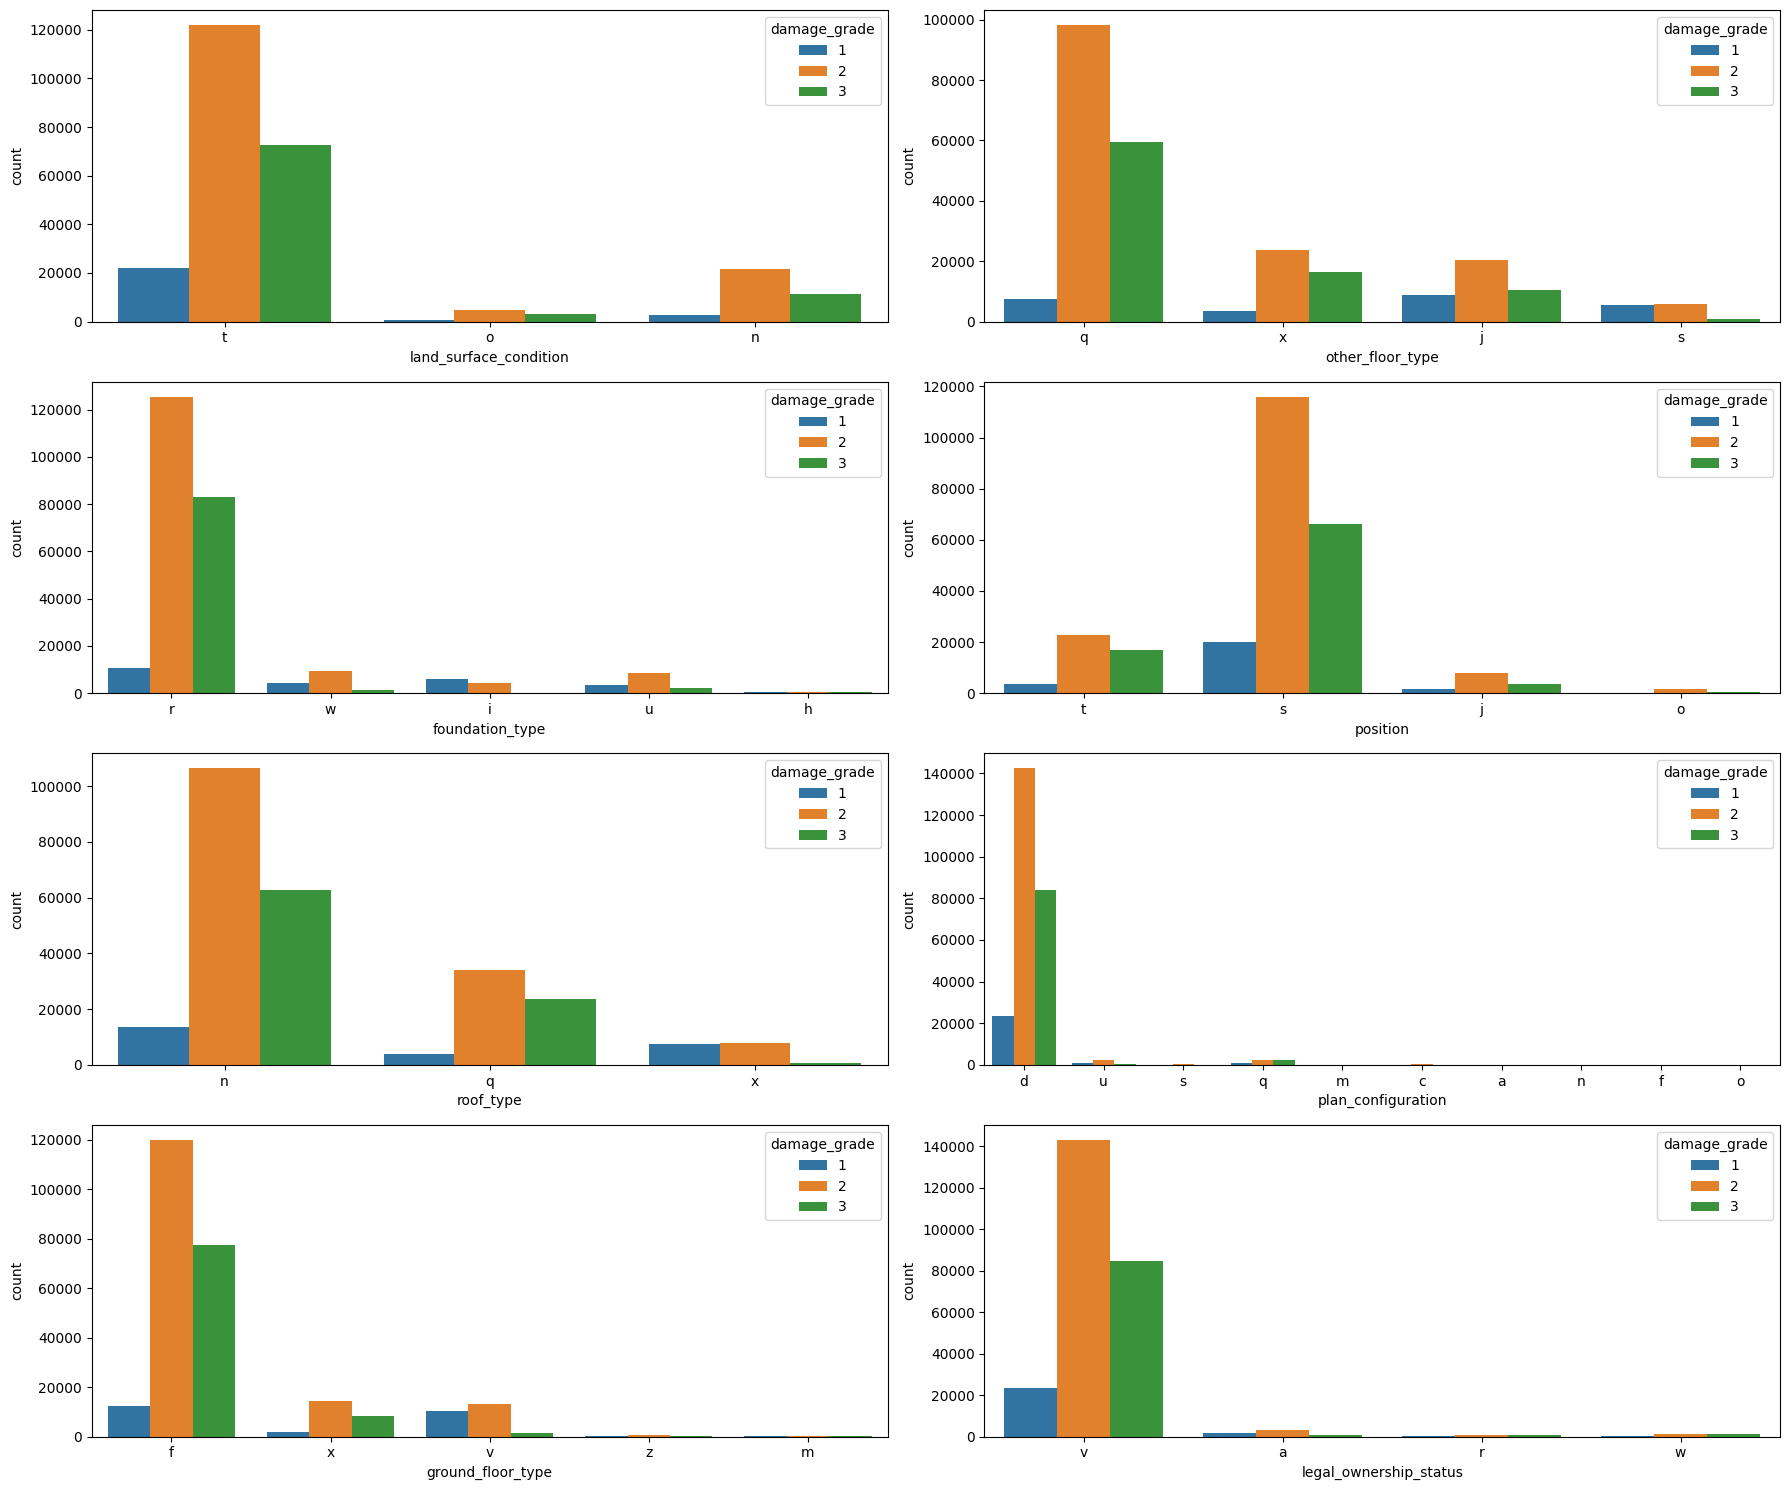

In [11]:
cols = train_data_cat.columns
fig,axs = plt.subplots(4,2, figsize=(18,15))
aux = 0
for i in range(0,2):
    for j in range(0,4):
        sns.countplot(train_data_cat.join(label_data['damage_grade']), hue='damage_grade', x=cols[aux], ax=axs[j][i])
        aux+=1
fig.tight_layout()
plt.show()


Pode-se verificar que as variáveis binárias são muito espassas, com muitos valores iguais a zero. Exceto para a variável que indica se o edifício foi construído com argamassa de barro e pedra (<font color='blue'>has_superstructure_mud_mortar_stone</font>).  

C:\Users\deric\AppData\Local\Temp\ipykernel_23280\1685522692.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_data_bin[cols].hist(ax=ax)


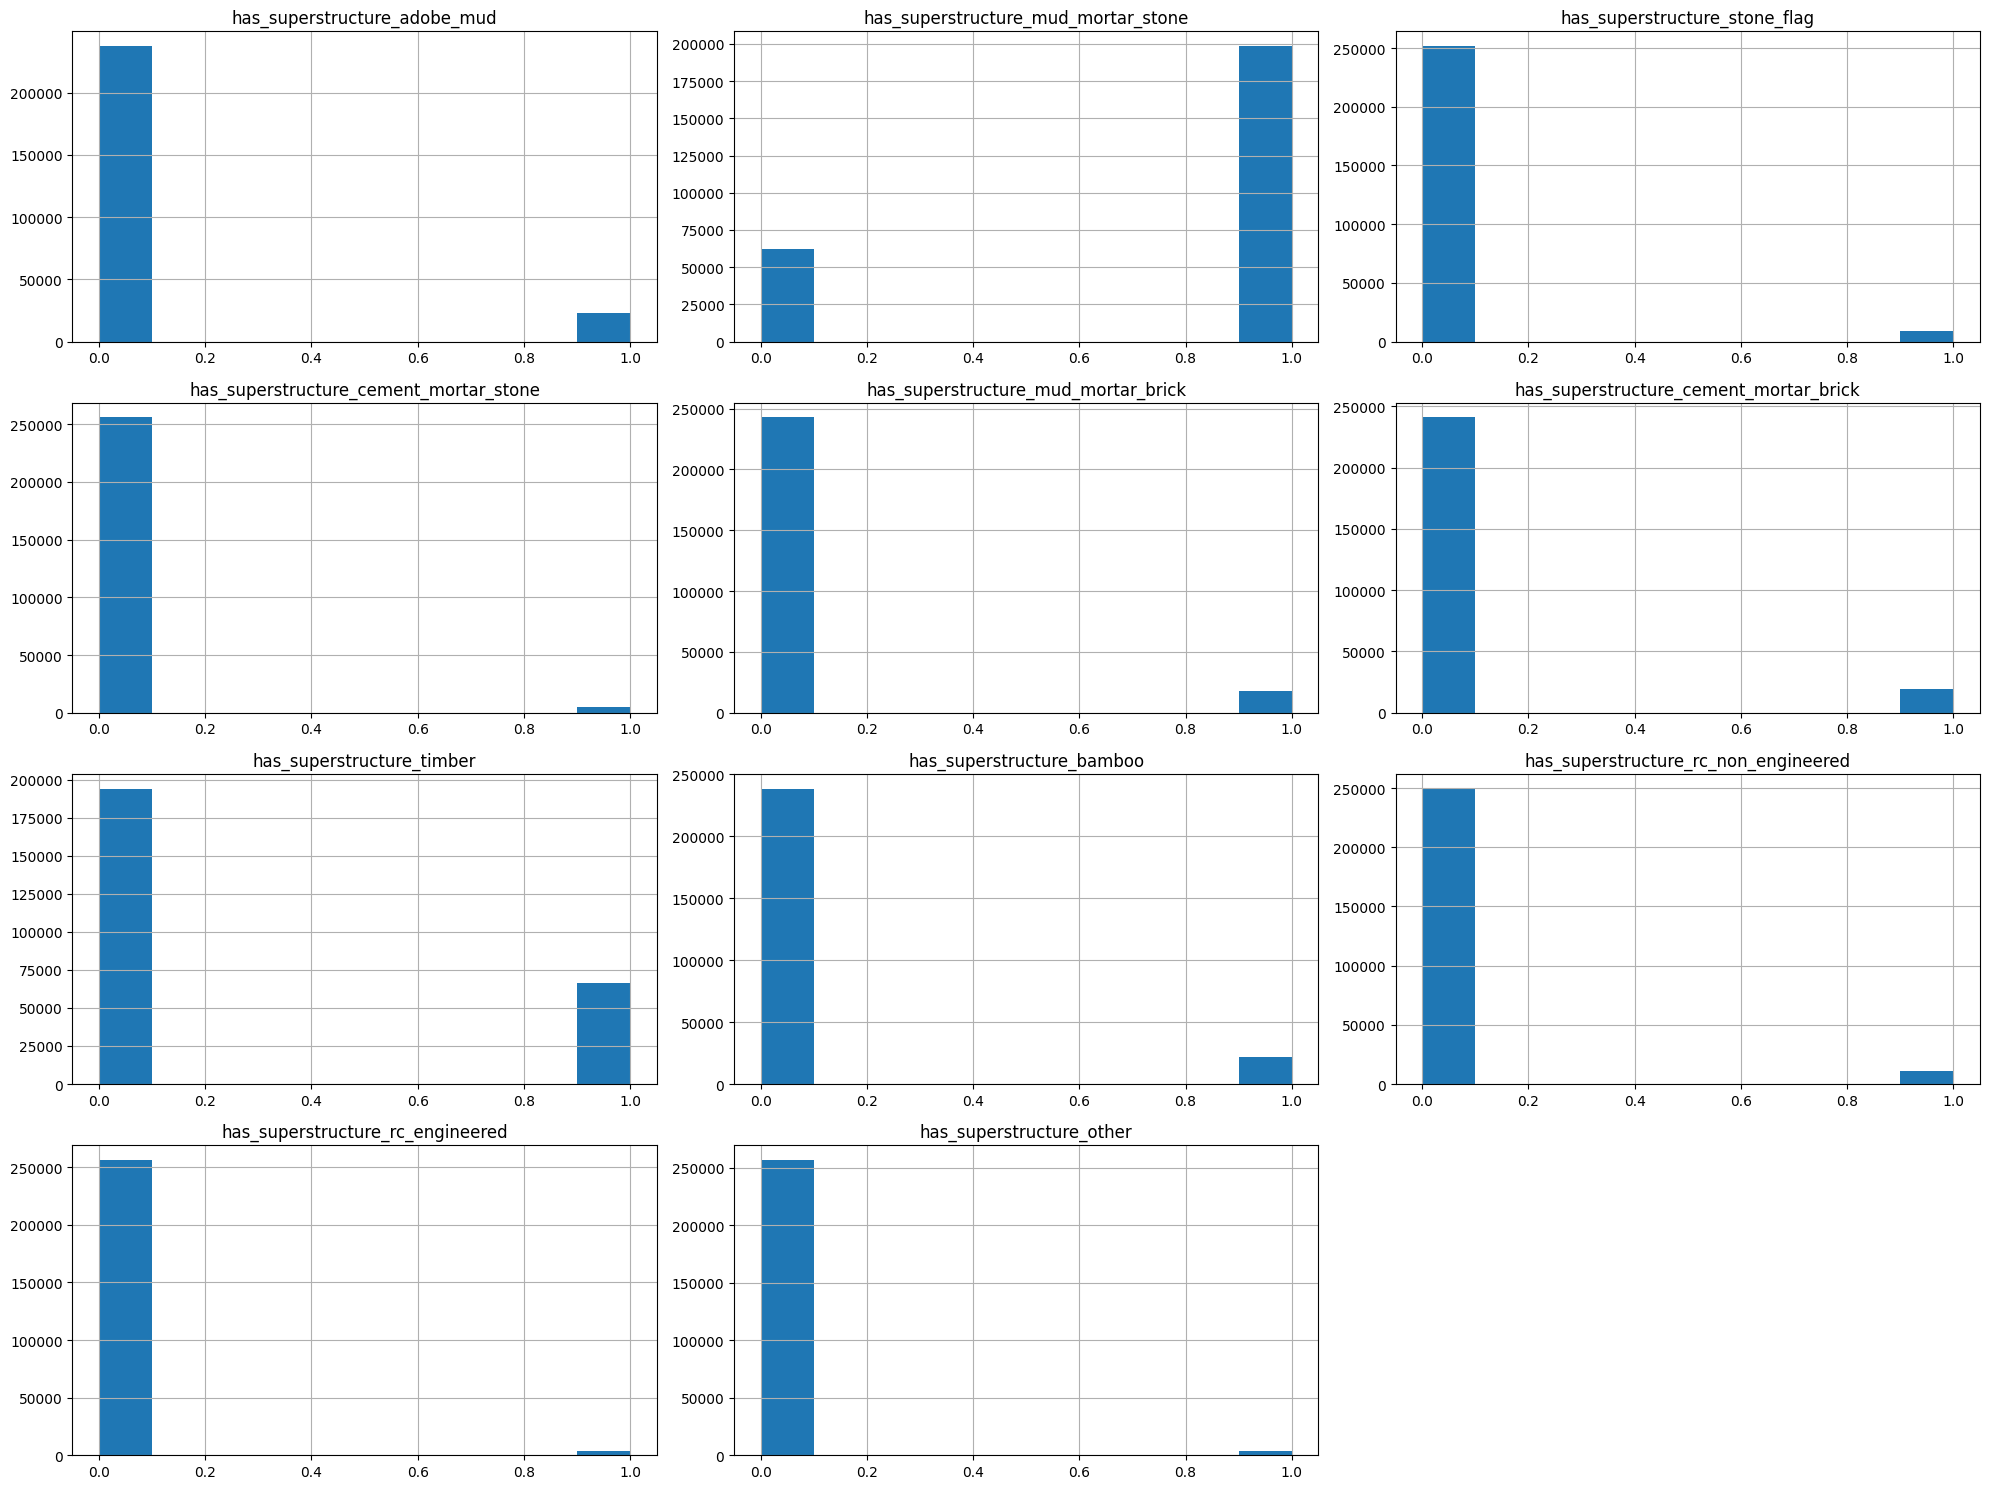

In [12]:
cols = [col for col in train_data_bin.columns if 'has_superstructure' in col]
fig,ax = plt.subplots(figsize=(20,15))
train_data_bin[cols].hist(ax=ax)
fig.tight_layout()
plt.show()
#train_data_c[cols].join(label_data['damage_grade']).corr()['damage_grade'].sort_values(ascending=False)

C:\Users\deric\AppData\Local\Temp\ipykernel_23280\1753796071.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_data_bin[cols].hist(ax=ax2)


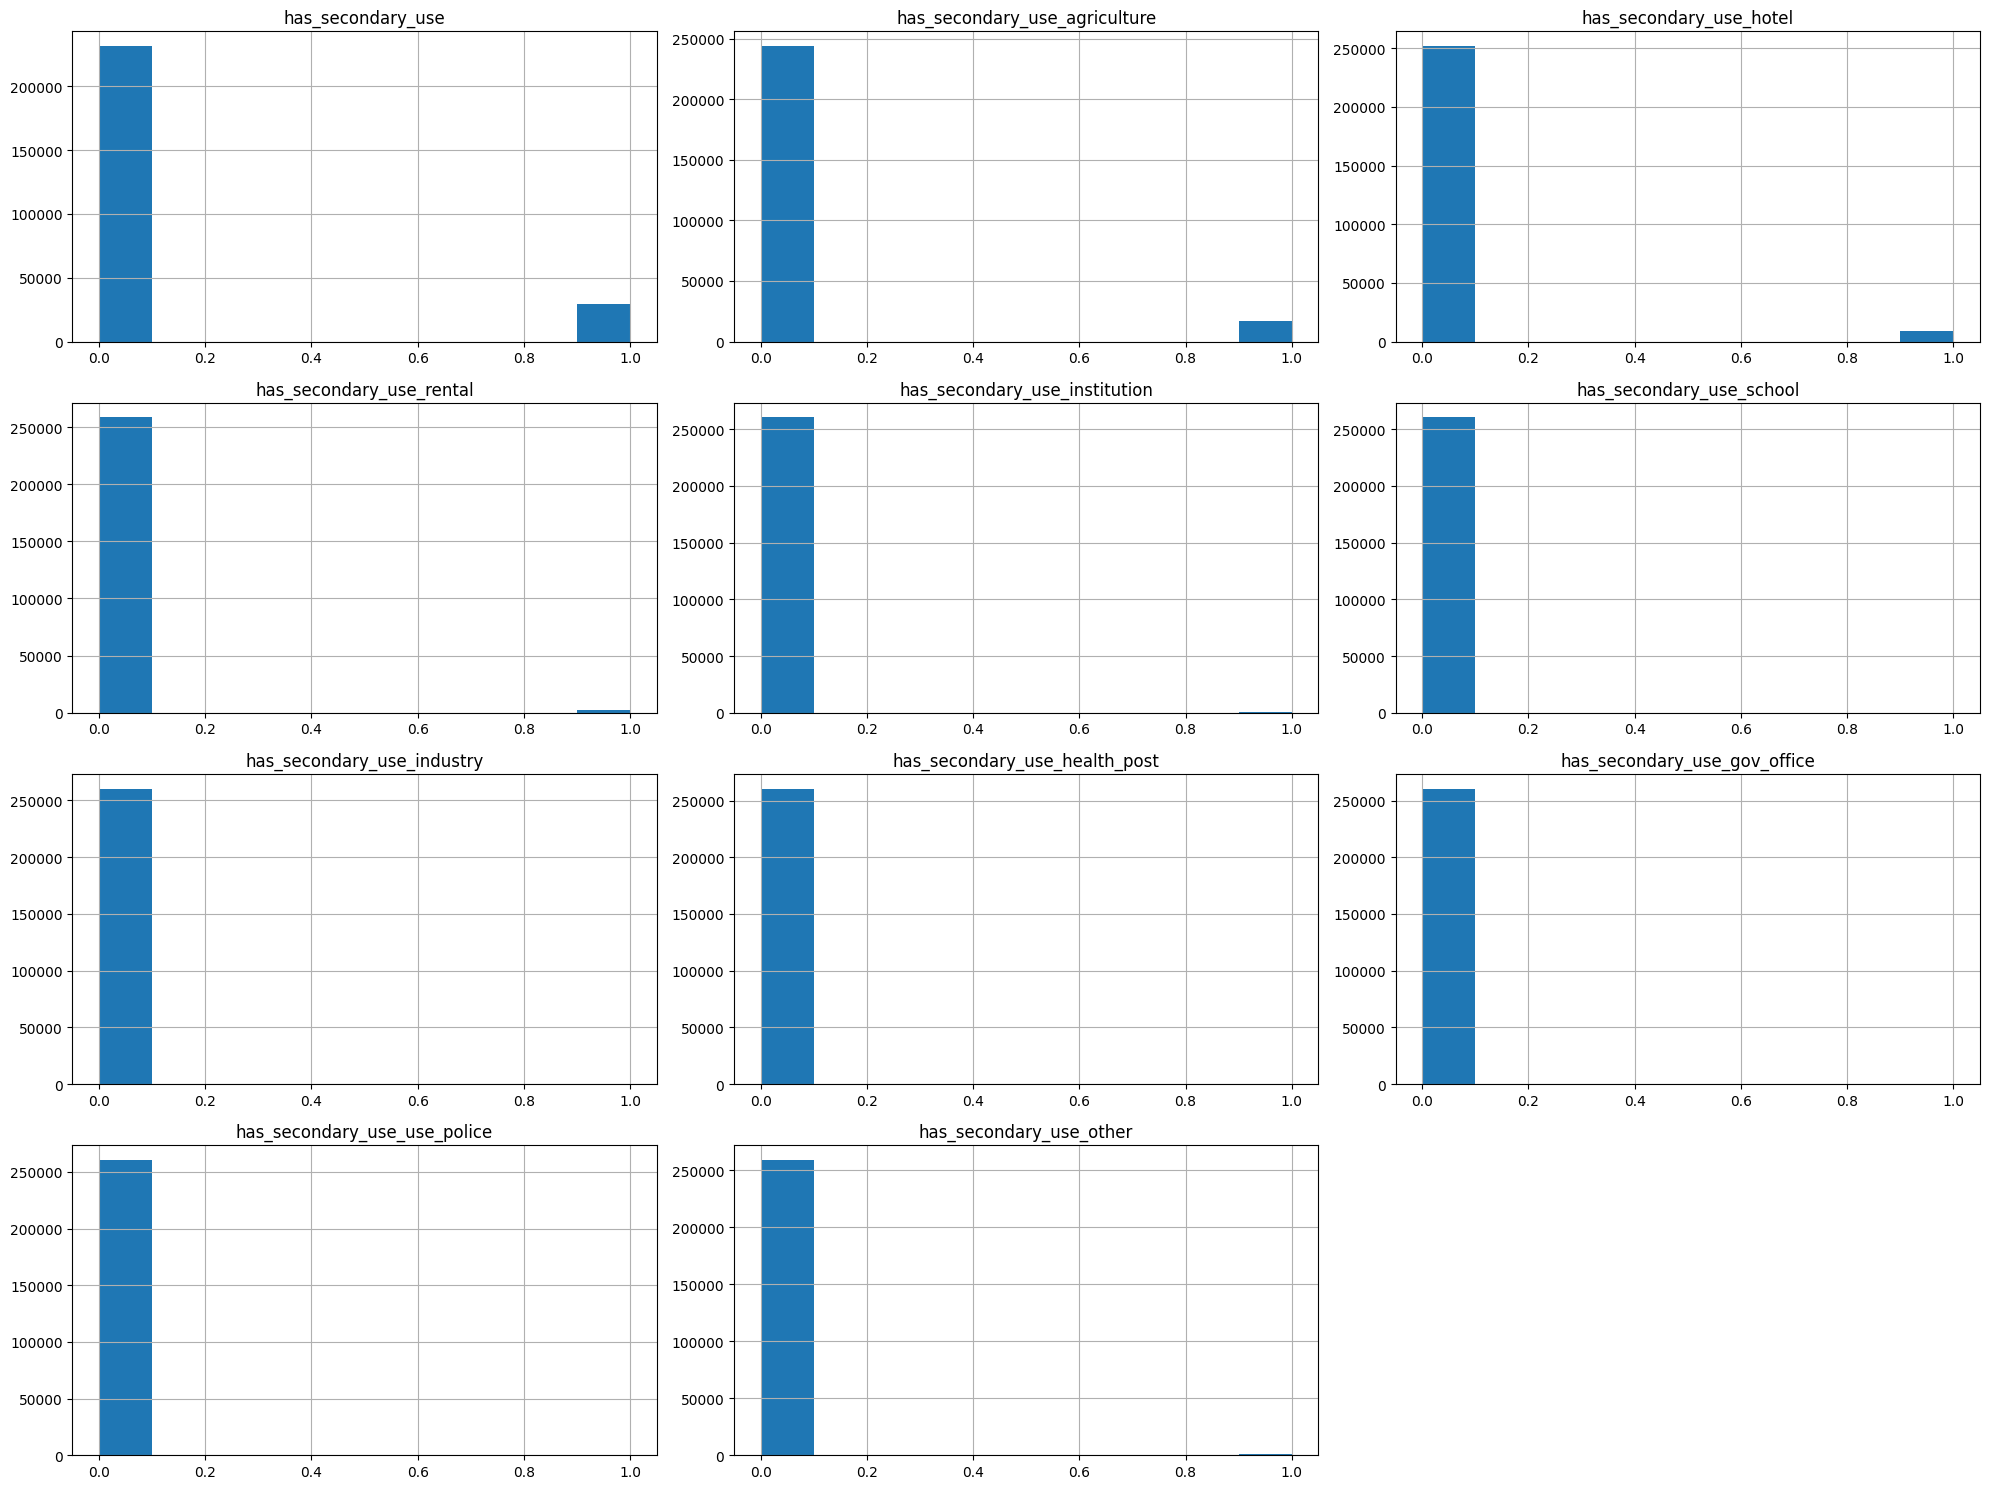

In [13]:
cols = [col for col in train_data_bin.columns if 'has_secondary_use' in col]
fig2,ax2 = plt.subplots(figsize=(20,15))
train_data_bin[cols].hist(ax=ax2)
fig2.tight_layout()
plt.show()

In [14]:
train_data_bin.head(8)

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28830,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94947,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
590882,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
201944,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333020,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728451,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
475515,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Verifica-se também que as variáveis de flag de estrutura não não mutuamente excludentes, ou seja, é possível que para um mesmo edíficio mais de uma variável esteja sinalizada com valor 1. O mesmo acontece com as variáveis que indicam a finalidade de uso do edifício, mas neste caso, quando existe um uso secundário para o edifício ele é sinalizado: na variável <font color='blue'>has_secondary_use</font> de maneira geral e na variável que indica a forma de uso específica, como por exemplo <font color='blue'>has_secondary_use_agriculture</font> para finalidade agrícola.

Isso se comprova através da análise de similaridade entre esses vetores de variáveis, utilizando o coeficiente de Jaccard, que calcula a razão entre a intersecção pela união de dois vetores (ou conjuntos). Quanto mais elementos em comum, mais esse coeficiente se aproximará de 1. É esperado que as variáveis <font color='blue'>has_secondary_use_agriculture</font> e <font color='blue'>has_secondary_use</font> apresentem maior similaridade pois o uso com finalidade agrícola é o mais frequente na base de dados, seguido do uso com finalidade de hotel (<font color='blue'>has_secondary_use_hotel</font>).

Apesar das variáveis de flag de estrutura não serem excludentes, elas apresentam pouca similaridade. Isto significa que não existe um padrão de repetição entre os flags, ou seja, não existe um padrão de construção combinando mais de uma superestrutura que se repete com frequência entre os registros. A combinação que talvez mais se destacaria neste sentido seria a de superestrutura formada ao mesmo tempo por madeira e bambu (<font color='blue'>has_superstructure_timber</font> e <font color='blue'>has_superstructure_bambu</font>), apesar da similaridade entre elas ainda ser relativamente baixa.


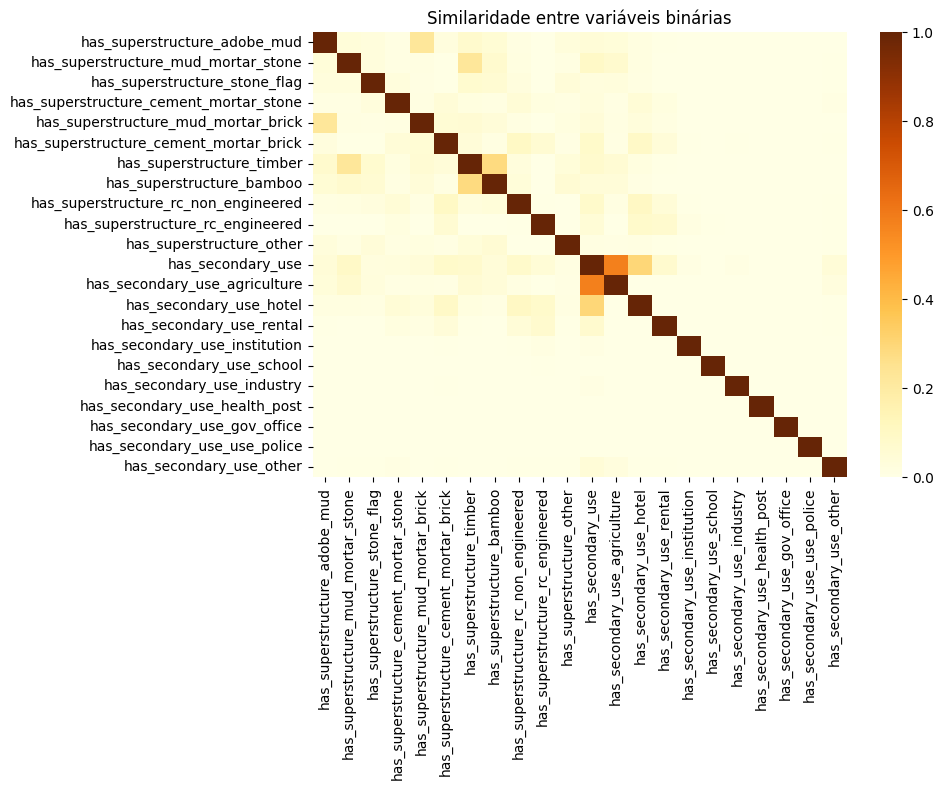

In [15]:
#função para calcular a similaridade entre dois vetores utilizando o coeficiente de Jaccard
def jaccard_binary(x1,x2):
    """Função para calcular a similaridade entre dois vetores x1 e x2."""
    intersection = np.logical_and(x1, x2)
    union = np.logical_or(x1, x2)
    similarity = intersection.sum() / float(union.sum())
    return similarity
def similarity_matrix(df):
    """Função para calcular a matriz de similaridade entre as colunas do dataframe df"""
    sim_matrix = np.zeros((len(df.columns),len(df.columns)))
    i=0
    j=0
    for col1 in df.columns:
        for col2 in df.columns:
            sim_matrix[i][j] = jaccard_binary(df[col1].values,df[col2].values)
            j+=1
        i+=1
        j=0
    return pd.DataFrame(sim_matrix, columns=df.columns, index=df.columns)
#variáveis de flag de construção
cols = [col for col in bin_attrs]
sim_matrix = similarity_matrix(train_data_bin[cols])

fig,ax = plt.subplots(figsize=(10,8))
colormap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(sim_matrix, ax=ax, cmap=colormap)
ax.set_title('Similaridade entre variáveis binárias')
fig.tight_layout()
plt.show()


<h4> Conclusões </h4>

Com base nesta análise inicial, alguns pontos importantes podem ser destacados:
<ul>
    <li>As variáveis de localização geográfica estão codificadas de forma aleatória ao longo dos níveis (level_1, level_2 e level_3);</li>
    <li>O conjunto formado pelas variáveis binárias (de flags) é muito espasso;</li>
    <li>Entre as variáveis escalares, pode-se considerar a presença de outliers apenas na variável <font color='blue'>age</font>;</li>
    <li>As variáveis numéricas são muito pobremente correlacionadas com a variável alvo;</li>
    <li>Trata-se de um problema de classificação com uma base de dados desbalanceada.</li>
</ul>

<h3>Limpeza e Preparação do Dados</h3>

Como não existem valores ausentes, é necessário tratar apenas os outliers da variável <font color='blue'>age</font>.
Os outliers serão removidos a partir do limite estatístico de 3 desvios-padrão e serão substituídos por um valor equivalente a 4 desvios-padrão para manter um afastamento dos demais valores da variável em questão.

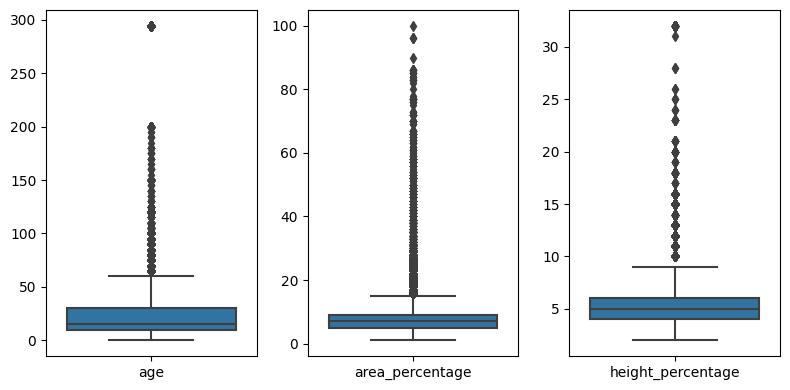

In [16]:
def remove_outliers(df, n_dev, cols):
    """Função para remover outliers substituindo por valores iguais
    a n_dev desvios-padrão nas colunas listadas em cols"""
    df1 = df.copy()
    for col in cols:
        threshold = 3*np.std(df1[col].values)
        new_value = n_dev*np.std(df1[col].values)
        df1[col]= df1[col].apply(lambda x: x if x<=threshold else new_value)
    return df1
#cleaned data
train_data_num_c = remove_outliers(train_data_num, 4, ['age'])

#boxplot das variáveis escalares
cols = [col for col in num_attrs if ('geo_level' not in col)and('count' not in col)]
fig,axs = plt.subplots(1,len(cols),figsize=(8,4))
for i in range(0,len(cols)):
    sns.boxplot(data=train_data_num_c[[cols[i]]], orient='v', ax=axs[i])
fig.tight_layout()
plt.show()

<h3> Pipeline </h3>

A partir desta primeira etapa de limpeza, pode-se começar a criar o pipeline de processamento da base.
Para isso, é necessário criar uma classe de transformação dos dados que irá herdar as classes <font color='green'>BaseEstimator, TransformerMixin</font> e <font color='green'>OneToOneFeatureMixin</font>.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
#OneToOneFeatureMixin - Provides get_feature_names_out for simple transformers

class Remove_Outliers(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    def __init__(self):
        self.stdev = None
        None
        
    def fit(self, X, y=None):
        self.stdev = np.std(X[['age']])
        return self
    
    def transform(self, X, y=None):
        X1 = self.remove_outliers(df=X,n_dev=4,cols=['age'])
        return X1
    
    def remove_outliers(self,df, n_dev, cols):
        """Função para remover outliers substituindo por valores iguais
        a n_dev desvios-padrão nas colunas listadas em cols"""
        df1 = df.copy()
        for col in cols:
            threshold = 3*self.stdev[col]
            new_value = n_dev*self.stdev[col]
            df1[col]= df1[col].apply(lambda x: x if x<=threshold else new_value)
        return df1   

pipe = Pipeline([('remove_outliers',Remove_Outliers())])
pipe

Pipeline(steps=[('remove_outliers', Remove_Outliers())])

<h3>Engenharia de Atributos</h3>

Pode-se inferir que edifícios mais altos e com uma área menor seriam mais impactados por um terremoto, pois teoricamente eles apresentam menor estabilidade. Dessa forma, faz sentido criar um novo atributo a partir das variáveis de altura e área percentuais.

Outra inferência possível é que edifícios que abrigam mais famílias por m<sup>2</sup> possam estar relacionados à regiões de periferia ou com infraestrutura mais precária. Também seria interessante verificar se existe uma correlação do número de famílias por área percentual com o nível de dano sofrido pelo edifício.

In [18]:
train_data_num_c['h_per_a'] = train_data_num_c['height_percentage']/train_data_num_c['area_percentage']
train_data_num_c['families_per_area'] = train_data_num_c['count_families']/train_data_num_c['area_percentage']

train_data_num_c.join(label_data['damage_grade']).corr()['damage_grade'].sort_values(ascending=False)

damage_grade           1.000000
count_floors_pre_eq    0.122308
h_per_a                0.108787
age                    0.096332
families_per_area      0.092572
count_families         0.056151
height_percentage      0.048130
geo_level_2_id         0.043161
geo_level_3_id         0.007932
geo_level_1_id        -0.072347
area_percentage       -0.125221
Name: damage_grade, dtype: float64

É interessante observar que a relação altura/área tem maior correlação com o nível de dano do que a altura percentual sozinha. O mesmo acontece com a relação de número de famílias/área se comparada apenas com o número de famílias. Muito embora a correlação entre todas essas variáveis e novos atributos com a variável alvo ainda é, no geral, muito baixa.

Pode-se introduzir uma etapa de criação destes novos atributos no pipeline de processamento.

In [19]:
class Create_New_Attrs(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X1 = X.copy()
        X1['h_per_a'] = X1['height_percentage']/X1['area_percentage']
        X1['families_per_area'] = X1['count_families']/X1['area_percentage']
        return X1
    
pipe = Pipeline([('remove_outliers',Remove_Outliers()),
                ('create_new_attrs',Create_New_Attrs())])
pipe

Pipeline(steps=[('remove_outliers', Remove_Outliers()),
                ('create_new_attrs', Create_New_Attrs())])

<h4>Codificação das Variáveis Geográficas</h4>

Já foi observado que as regiões foram codificadas sem obedecer uma lógica à priori, e isso pode trazer alguma dificuldade para o modelo que irá classificar os registros, especialmente para algoritmos baseados em árvores de decisão.

Quando se pensa em regiões geográficas, sabe-se que regiões que estão próximas tendem a ter características semelhantes. E quando se trata de um evento císmico, como um terremoto, a posição da região em relação ao epicentro se traduz em maior ou menor impacto causado. Quanto mais próxima do epicentro, maior será o impacto causado pelo terremoto, da mesma forma que, quanto mais distante do epicentro, menor o impacto.

Como não existem informações sobre a real localização das regiões mapeadas na base de dados, pode-se inferir pelos registros de danos nos edifícios se determinada região está mais próxima ou mais distante do epicentro do terremoto. E regiões que estivessem mais próximas do epicentro, teoricamente estariam mais próximas entre si, e deveriam ter códigos que refletissem essa proximidade. Então, a partir desse raciocínio, propõe-se uma nova codificação para as regiões baseada no impacto geral causado pelo terremoto.

O primeiro passo é criar um mapeamento para uma nova codificação.

In [20]:
#junção do geo_level_1_id com damage_grade para realizar o mapeamento baseado no damage_grade
train_label_data = train_data_num[['geo_level_1_id']].join(label_data['damage_grade'])
n_entries = train_label_data.shape[0]
#agrupa pelo geo_level_1_id, contando o numero de ocorrências
geo_l1_codemap = train_label_data.groupby('geo_level_1_id').count()
#conta o número de ocorrências de damage_level 3
geo_l1_codemap['damage_3_count'] = train_label_data.loc[train_label_data['damage_grade']==3].groupby('geo_level_1_id').count()
#faz um cálculo ponderando as duas contagens
geo_l1_codemap['weighted_dg'] = geo_l1_codemap['damage_grade'] * geo_l1_codemap['damage_3_count']/n_entries
#depois ordena
geo_l1_codemap.sort_values(by=['weighted_dg'], inplace=True)

geo_l1_codemap['new_code'] = range(0,31)
#nessa ordem tem-se o novo mapa de códigos para geo_level_1_id
geo_l1_codemap

,damage_grade,damage_3_count,weighted_dg,new_code
geo_level_1_id,,,,
29,396,39,0.059263,0
19,372,66,0.094213,1
28,265,108,0.109823,2
24,1310,132,0.663543,3
2,931,236,0.843113,4
23,1121,281,1.208748,5
14,1714,276,1.815281,6
5,2690,230,2.374127,7
1,2701,305,3.161174,8


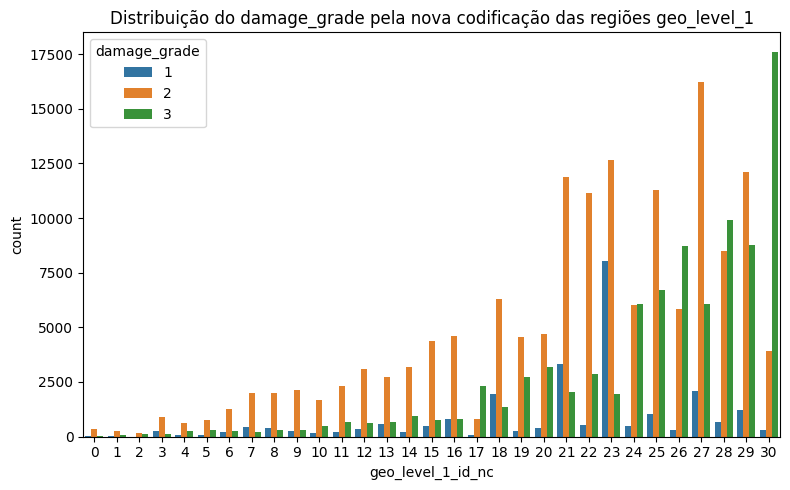

Número de regiões distintas no nível 2
1414
Número de regiões distintas no nível 3
11595


In [21]:
#function to encode the geo_level_1_id
def geo_l1_encoder(data):
    newlist = [geo_l1_codemap['new_code'].loc[data['geo_level_1_id'].iloc[i]] for i in range(data.shape[0])]
    data['geo_level_1_id_nc'] = newlist
    return data

geo_l1_encoder(train_data_num_c)
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(train_data_num_c[['geo_level_1_id_nc']].join(label_data['damage_grade']),
           x='geo_level_1_id_nc', hue='damage_grade', ax=ax)
ax.set_title('Distribuição do damage_grade pela nova codificação das regiões geo_level_1')
fig.tight_layout()
plt.show()

print('Número de regiões distintas no nível 2')
print(len(train_data_num_c['geo_level_2_id'].unique()))
print('Número de regiões distintas no nível 3')
print(len(train_data_num_c['geo_level_3_id'].unique()))

É possível perceber que no nível 2 e 3 nem todas as regiões estão presentes na base de dados de treinamento. O range de valores possíveis para o <font color='blue'>geo_level_2_id</font> é de 0 à 1427 e existem apenas 1414 valores distintos. Para o <font color='blue'>geo_level_2_id</font> o range de valores é de 0 à 12567 e existem apenas 11595 valores distintos. Neste caso, uma nova codificação pode acarretar em problemas quando aplicada à base de testes e ao colocar o modelo em produção, uma vez que poderão surgir regiões que não foram recodificadas a partir da base de treinamento. Também não é possível, desde já, saber a qual região de nível 1 essas regiões faltantes pertencem.

Uma estratégia para lidar com esse problema é identificar a região de nível 1 que o edifício pertence, e aplicar a essa nova região que não havia sido mapeada anteriormente o mesmo código da região de nível 2 com maior ocorrência de registros dentro da região de nível 1.

In [35]:
#cria um dataframe auxiliar ordenado pela nova codificação em geo_level_1
aux2 = train_data_num_c[['geo_level_2_id','geo_level_1_id_nc']].sort_values('geo_level_1_id_nc',ascending=True).copy()
#cria um dicionário com chave igual ao novo código de geo_level_1 e com valores igual a um segundo dicionário 
#onde a chave é o geo_level_2_id e o valor é a quantidade de registros (edifícios) nessa área
aux_s = {x:{y: aux2.loc[aux2['geo_level_2_id']==y].count()[0] for y in aux2.loc[aux2['geo_level_1_id_nc']==x,'geo_level_2_id'].unique()} for x in range(0,31)}
j=0
for i in aux_s.keys():
    #ordena as chaves do segundo dicionário a partir do valor de ocorrência, colocando os com maior quantidade no início
    size = len(aux_s[i])
    aux_s[i] = {'geo_level_2_id':pd.DataFrame(sorted(aux_s[i].items(), key= lambda item: item[1], reverse=True))[0].values,
                'new_code':range(j,j+size)}
    aux_s[i] = pd.DataFrame(aux_s[i]).set_index(['geo_level_2_id'])
    j+=size
geo_l2_codemap = aux_s
geo_l2_codemap[0].head()

,new_code
geo_level_2_id,
903,0
510,1
1075,2
1086,3
1360,4


O mapa de códigos criado para a região de nível 2 consiste de um dicionário onde cada chave corresponte a um índice da região nível 1 (na nova codificação) e cada valor associado é um DataFrame cujos índices são os <font color='blue'>geo_level_2_id</font> das áreas contidas naquela região ordenados por ordem decrescente de número de ocorrências na base de treinamento, associadas a um coluna com o novo código correspondente para região de nível 2.

Quando um valor de <font color='blue'>geo_level_2_id</font> não estiver previamente mapeado, ele será mapeado com o código equivalente do primeiro elemento do DataFrame correspondente. Por exemplo, se a região com <font color='blue'>geo_level_2_id</font> = 31 não estiver mapeada, e ela pertencer à região <font color='blue'>geo_level_1_id</font> = 3, ela será mapeada no segundo nível com o mesmo código da região com mais ocorrências na <font color='blue'>geo_level_1_id</font> = 3, através do código: geo_l2_codemap[3].iloc[0].

In [23]:
#function to encode the geo_level_2_id
def geo_l2_encoder(data):
    new_ids = []
    for building in data.index:
        id2 = data.loc[building,'geo_level_2_id']
        id1 = data.loc[building,'geo_level_1_id_nc']
        if id2 in geo_l2_codemap[id1].index:
            new_ids.append(geo_l2_codemap[id1].loc[id2,'new_code'])
        else:
            new_ids.append(geo_l2_codemap[id1].iloc[0]['new_code'])
    data['geo_level_2_id_nc'] = new_ids
    return data

geo_l2_encoder(train_data_num_c)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,h_per_a,families_per_area,geo_level_1_id_nc,geo_level_2_id_nc
building_id,,,,,,,,,,,,
802906,6,487,12198,2,30.0,6,5,1,0.833333,0.166667,27,1164
28830,8,900,2812,2,10.0,8,7,1,0.875000,0.125000,28,1269
94947,21,363,8973,2,10.0,5,5,1,1.000000,0.200000,26,1081
590882,22,418,10694,2,10.0,6,5,1,0.833333,0.166667,16,710
201944,11,131,1488,3,30.0,8,9,1,1.125000,0.125000,20,827
...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55.0,6,3,1,0.500000,0.166667,15,675
669485,17,715,2060,2,0.0,6,5,1,0.833333,0.166667,30,1371
602512,17,51,8163,3,55.0,6,7,1,1.166667,0.166667,30,1351


Como muitas regiões do <font color='blue'>geo_level_3_id</font> não aparecem na base de treinamento (cerca de 972 regiões), não faz muito sentido recodificar esse nível 3, pois corre-se o risco de falsear demais as informações dessa variável.

Dessa forma, quando a recodificação das variáveis geográficas for utilizada, a variável <font color='blue'>geo_level_3_id</font> será descartada.

In [24]:
#adicionar uma classe que irá criar as novas variáveis geográficas
class Create_New_Geo_Codes(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    def __init__(self, labels):
        self.labels = labels
        self.geo_l1_codemap = None
        self.geo_l2_codemap = None
        return None
    
    def fit(self, X, y=None):
        X1 = X.copy()
        self.make_l1_codemap(X1)
        self.geo_l1_encoder(X1)
        self.geo_l2_codemap = self.make_l2_codemap(X1)
        return self
    
    def transform(self, X, y=None):
        X1 = X.copy()
        self.geo_l1_encoder(X1)
        self.geo_l2_encoder(X1)
        return X1
    
    def make_l1_codemap(self,data):
        #joining the geo_level_1_id with damage_grade to make the new code map
        train_label_data = data[['geo_level_1_id']].join(self.labels['damage_grade'])
        n_entries = train_label_data.shape[0]
        #at first I grouped the occurrences of damage_grade=3, count them and sort in ascending order
        self.geo_l1_codemap = train_label_data.groupby('geo_level_1_id').count()
        self.geo_l1_codemap['damage_3_count'] = train_label_data.loc[train_label_data['damage_grade']==3].groupby('geo_level_1_id').count()
        self.geo_l1_codemap['weighted_dg'] = self.geo_l1_codemap['damage_grade'] * self.geo_l1_codemap['damage_3_count']/n_entries
        self.geo_l1_codemap.sort_values(by=['weighted_dg'], inplace=True)
        self.geo_l1_codemap['new_code'] = range(0,31)
        return None
    
    def geo_l1_encoder(self,data):
        newlist = [self.geo_l1_codemap['new_code'].loc[data['geo_level_1_id'].iloc[i]] for i in range(data.shape[0])]
        data['geo_level_1_id_nc'] = newlist
        return data
    
    def make_l2_codemap(self,data):
        #cria um dataframe auxiliar ordenado pela nova codificação em geo_level_1
        aux2 = data[['geo_level_2_id','geo_level_1_id_nc']].sort_values('geo_level_1_id_nc',ascending=True).copy()
        #cria um dicionário com chave igual ao novo código de geo_level_1 e com valores igual a um segundo dicionário 
        #onde a chave é o geo_level_2_id e o valor é a quantidade de registros (edifícios) nessa área
        aux_s = {x:{y: aux2.loc[aux2['geo_level_2_id']==y].count()[0] for y in aux2.loc[aux2['geo_level_1_id_nc']==x,'geo_level_2_id'].unique()} for x in range(0,31)}
        j=0
        for i in aux_s.keys():
            #ordena as chaves do segundo dicionário a partir do valor de ocorrência, colocando os com maior quantidade no início
            size = len(aux_s[i])
            aux_s[i] = {'geo_level_2_id':pd.DataFrame(sorted(aux_s[i].items(), key= lambda item: item[1], reverse=True))[0].values,
                'new_code':range(j,j+size)}
            aux_s[i] = pd.DataFrame(aux_s[i]).set_index(['geo_level_2_id'])
            j+=size
        return aux_s
    
    def geo_l2_encoder(self,data):
        new_ids = []
        for building in data.index:
            id2 = data.loc[building,'geo_level_2_id']
            id1 = data.loc[building,'geo_level_1_id_nc']
            if id2 in self.geo_l2_codemap[id1].index:
                new_ids.append(self.geo_l2_codemap[id1].loc[id2,'new_code'])
            else:
                new_ids.append(self.geo_l2_codemap[id1].iloc[0]['new_code'])
        data['geo_level_2_id_nc'] = new_ids
        return data
#instancia a classe antes de inseri-la no pipeline    
create_new_geo_ids = Create_New_Geo_Codes(labels=label_data)
    
pipe = Pipeline([('remove_outliers',Remove_Outliers()),
                ('create_new_attrs',Create_New_Attrs()),
                ('crete_new_geo_ids', create_new_geo_ids)])
pipe

Pipeline(steps=[('remove_outliers', Remove_Outliers()),
                ('create_new_attrs', Create_New_Attrs()),
                ('crete_new_geo_ids',
                 Create_New_Geo_Codes(labels=             damage_grade
building_id              
802906                  3
28830                   2
94947                   3
590882                  2
201944                  3
...                   ...
688636                  2
669485                  3
602512                  3
151409                  2
747594                  3

[260601 rows x 1 columns]))])

In [25]:
transformed_data = pipe.fit_transform(train_data)
transformed_data

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,h_per_a,families_per_area,geo_level_1_id_nc,geo_level_2_id_nc
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30.0,6,5,t,r,n,...,0,0,0,0,0,0,0.833333,0.166667,27,1164
28830,8,900,2812,2,10.0,8,7,o,r,n,...,0,0,0,0,0,0,0.875000,0.125000,28,1269
94947,21,363,8973,2,10.0,5,5,t,r,n,...,0,0,0,0,0,0,1.000000,0.200000,26,1081
590882,22,418,10694,2,10.0,6,5,t,r,n,...,0,0,0,0,0,0,0.833333,0.166667,16,710
201944,11,131,1488,3,30.0,8,9,t,r,n,...,0,0,0,0,0,0,1.125000,0.125000,20,827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55.0,6,3,n,r,n,...,0,0,0,0,0,0,0.500000,0.166667,15,675
669485,17,715,2060,2,0.0,6,5,t,r,n,...,0,0,0,0,0,0,0.833333,0.166667,30,1371
602512,17,51,8163,3,55.0,6,7,t,r,q,...,0,0,0,0,0,0,1.166667,0.166667,30,1351


Feita a limpeza da base de dados e a criação de novos atributos, pode-se passar para etapa de escalonamento das variáveis.
Juntamente a isso, será feita a seleção de quais variáveis serão utilizadas como atributos do modelo de classificação.

<h3> Escalonamento, codificação e seleção das variáveis</h3>

Iniciando pelas variáveis binárias, opta-se por descartar as variáveis flag de ocupação dos edifícios, mantendo apenas a <font color='blue'>has_secondary_use</font> que indica de forma geral se o edifício possui uma outra finalidade de ocupação.

A variável <font color='blue'>count_families</font> será descartada já que essa informação já está incorporada na variável criada: <font color='blue'>families_per_area</font>.

Para escalonar as variáveis numéricas, serão utilizadas duas abordagens: Min-Max Scaler para as variáveis de localização geográfica, e Standard Scaler para as variáveis numéricas escalares e derivadas à partir delas. 

<h4>Codificação das Variáveis Categóricas</h4>

Como as variáveis categóricas nominais apresentam muitas classes associadas e algumas delas são muito desbalanceadas, utilizar uma codificação one-hot em todas elas geraria um conjunto de dados muito espasso. 

Dessa forma, as variáveis <font color='blue'>plan_configuration</font> e <font color='blue'>legal_ownership_status</font> não serão codificadas, uma vez que elas apresentam uma predominância considerável de uma única classe nos registros da base de treinamento, e serão, consequentemente, descartadas.

As demais variáveis serão codificadas com o One-Hot Encoder, porém com a configuração de classe infrequente e com limitação de 3 classes frequentes. Posteriormente, ao dividir a base de dados de treinamento separando uma parte para validação, pode acontecer de alguma classe pouco frequente não estar presente no conjunto de treinamento, dessa forma ela será codificada na classe infrequente. Todas as classes com representação abaixo de 10% serão consideradas infrequentes.

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder

del_attrs = [col for col in train_data_bin.columns if 'has_secondary_use_' in col]
for col in ['plan_configuration', 'count_families',
           'geo_level_1_id','geo_level_2_id','geo_level_3_id', 'legal_ownership_status']:
    del_attrs.append(col)

num_attrs_ = [col for col in list(train_data_num_c.columns) if col not in del_attrs]
coded_attrs = ['geo_level_1_id_nc','geo_level_2_id_nc']
cat_attrs_ = [col for col in cat_attrs if col not in del_attrs]

column_transformer = ColumnTransformer([
    ('num', StandardScaler(), num_attrs_),
    ('coded', MinMaxScaler(), coded_attrs),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist',min_frequency=0.1,max_categories=3),cat_attrs_),
    ('drop', 'drop', del_attrs)],remainder='passthrough',verbose_feature_names_out=True)

        
pipe = Pipeline([('remove_outliers',Remove_Outliers()),
                ('create_new_attrs',Create_New_Attrs()),
                ('crete_new_geo_ids', create_new_geo_ids),
                ('column_tranformer', column_transformer)])
pipe

Pipeline(steps=[('remove_outliers', Remove_Outliers()),
                ('create_new_attrs', Create_New_Attrs()),
                ('crete_new_geo_ids',
                 Create_New_Geo_Codes(labels=             damage_grade
building_id              
802906                  3
28830                   2
94947                   3
590882                  2
201944                  3
...                   ...
688636                  2
669485                  3
602512                  3
151409                  2
747594                  3

[260601 rows x 1 columns])),
                ('column_tranformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', St...
                                                   'has_secondary_use_rental',
                                                   'has_secondary_use_institution',
                                                   'has_secondary_use_school',
                                                   'has_secondary_use_industry',
                                                   'has_secondary_use_health_post',
                                                   'has_secondary_use_gov_office',
                                                   'has_secondary_use_use_police',
                                                   'has_secondary_use_other',
                                                   'plan_configuration',
                                                   'count_families',
                                                   'geo_level_1_id',
                                                   'geo_level_2_id',
                                                   'geo_level_3_id',
                                                   'legal_ownership_status'])]))])

In [27]:
transformed_data = pipe.fit_transform(train_data)
transformed_data

array([[-0.17827372,  0.2582993 , -0.45946001, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17827372, -0.45894188, -0.00410967, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17827372, -0.45894188, -0.68713518, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.19598853,  1.15485078, -0.45946001, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17827372, -0.45894188,  1.36194134, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.19598853, -0.45894188, -0.23178484, ...,  0.        ,
         0.        ,  0.        ]])

<h3>Dados de Treinamento e Validação</h3>

Agora que o Pipeline de Pré-processamento dos dados está construído, é necessário separar a base de treinamento em dois conjuntos: de treinamento e de validação.

Assim, pode-se validar o modelo com dados à parte do treinamento antes de "colocá-lo em produção".

Apesar das análises terem sido feitas com toda a base de treinamento, todos os parâmetros do pipeline, como por exemplo o mapa de ids para codificação das regiões geográficas serão construídos dentro do método fit(). Dessa forma não haverá vazamento de dados do conjunto de treinamento para o de validação. Quando esse tipo de implementação não é possível, é preciso dividir a base de treinamento antes de realizar a construção do pipeline.

Será utilizada uma separação estratificada, uma vez que a variável alvo é muito desbalanceada. Assim garante-se que tanto em treinamento quanto em validação irão existir registros na mesma proporção para cada classe de <font color='blue'>damage_grade</font>.

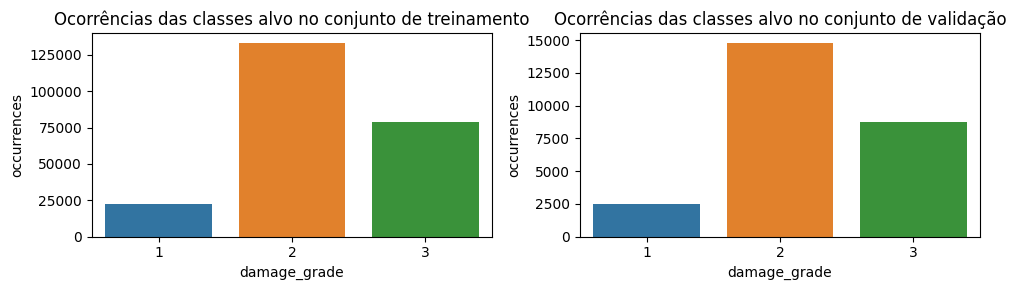

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
#split the training dataset stratifying by damage_grade
for train_index, test_index in splitter.split(train_data,label_data):
    strat_train_set = train_data.iloc[train_index]
    strat_val_set = train_data.iloc[test_index]
    label_train_set = label_data.iloc[train_index]
    label_val_set = label_data.iloc[test_index]

fig,ax = plt.subplots(1,2,figsize=(10,3))
sns.countplot(label_train_set, x='damage_grade',ax=ax[0])
ax[0].set_xlabel('damage_grade')
ax[0].set_ylabel('occurrences')
ax[0].set_title('Ocorrências das classes alvo no conjunto de treinamento')
sns.countplot(label_val_set, x='damage_grade',ax=ax[1])
ax[1].set_xlabel('damage_grade')
ax[1].set_ylabel('occurrences')
ax[1].set_title('Ocorrências das classes alvo no conjunto de validação')

fig.tight_layout()
plt.show()

<h3>Treinamento do Modelo</h3>

Inicialmente será treinado um modelo baseado em Floresta Aleatória (que é o mesmo utilizado na página de benchmark do problema no site do DrivenData). Outros modelos serão avaliados em trabalhos futuros.


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#I decided to keep the code as the same as in the bechmark page
fullpipe = make_pipeline(pipe, 
                     RandomForestClassifier(random_state=2018))
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(fullpipe, param_grid, cv=5, verbose=4)
gs.fit(X=strat_train_set, y=label_train_set['damage_grade'].values.ravel())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END randomforestclassifier__min_samples_leaf=1, randomforestclassifier__n_estimators=50;, score=0.705 total time=  42.4s
[CV 2/5] END randomforestclassifier__min_samples_leaf=1, randomforestclassifier__n_estimators=50;, score=0.705 total time=  43.2s
[CV 3/5] END randomforestclassifier__min_samples_leaf=1, randomforestclassifier__n_estimators=50;, score=0.704 total time=  43.8s
[CV 4/5] END randomforestclassifier__min_samples_leaf=1, randomforestclassifier__n_estimators=50;, score=0.703 total time=  43.8s
[CV 5/5] END randomforestclassifier__min_samples_leaf=1, randomforestclassifier__n_estimators=50;, score=0.703 total time=  43.6s
[CV 1/5] END randomforestclassifier__min_samples_leaf=1, randomforestclassifier__n_estimators=100;, score=0.708 total time= 1.0min
[CV 2/5] END randomforestclassifier__min_samples_leaf=1, randomforestclassifier__n_estimators=100;, score=0.705 total time= 1.0min
[CV 3/5] END randomforestcla

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('remove_outliers',
                                                         Remove_Outliers()),
                                                        ('create_new_attrs',
                                                         Create_New_Attrs()),
                                                        ('crete_new_geo_ids',
                                                         Create_New_Geo_Codes(labels=             damage_grade
building_id              
802906                  3
28830                   2
94947                   3
590882                  2
201944                  3
...                   ...
688636                  2
669485                  3
602512                  3
151409                  2
747594                  3

[260601 rows x 1 columns])),
                                                        ('column_tranformer',
                                                         ColumnTra...
                                                                                           'has_secondary_use_use_police',
                                                                                           'has_secondary_use_other',
                                                                                           'plan_configuration',
                                                                                           'count_families',
                                                                                           'geo_level_1_id',
                                                                                           'geo_level_2_id',
                                                                                           'geo_level_3_id',
                                                                                           'legal_ownership_status'])]))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2018))]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 5],
                         'randomforestclassifier__n_estimators': [50, 100]},
             verbose=4)

In [30]:
from sklearn.metrics import f1_score

print('Melhores parâmetros:')
print(gs.best_params_)

in_sample_preds = gs.predict(strat_train_set)
print('In-Sample F1_Score: ',f1_score(label_train_set['damage_grade'].values, in_sample_preds, average='micro'))

Melhores parâmetros:
{'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__n_estimators': 100}
In-Sample F1_Score:  0.7886671783064723


In [31]:
val_sample_preds = gs.predict(strat_val_set)
f1_score(label_val_set['damage_grade'].values, val_sample_preds, average='micro')

0.7292506043513296

In [32]:
submission_file = os.path.join(data_path,'submission_format.csv')
test_data = pd.read_csv(test_data_file, index_col='building_id')

predictions = gs.predict(test_data)

submission_format = pd.read_csv(submission_file, index_col='building_id')
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [33]:
submission_final = os.path.join(data_path,'submission.csv')
my_submission.to_csv(submission_final)

A submissão final recebeu um score de <font color='green'>0.7263</font>, muito próximo do score obtido com o conjunto de validação. É também um score muito superior ao do benchmark disponibilizado pelo drivendata.

Obs.: O Score do Leaderboard quando foi feita essa submissão era de 0.7558.

<h3>Trabalhos Futuros</h3>

<ul>
    <li>Avaliar a codificação das variáveis categóricas. Testar o TargetEncoder para as variáveis selecionadas.</li>
    <li>Fazer uma nova seleção das variáveis binárias.</li>
    <li>Treinar outros modelos e avaliar o desempenho.</li>
</ul>
    